In [1]:
import pandas
import altair

In [2]:
df = pandas.DataFrame(index=pandas.interval_range(start=0, end=100, freq=10, closed="left"), columns=["sumw"])
df.sumw = [0, 12, 40, 125, 266, 1032, 377, 185, 21, 5]

In [3]:
df

,sumw
"[0, 10)",0
"[10, 20)",12
"[20, 30)",40
"[30, 40)",125
"[40, 50)",266
"[50, 60)",1032
"[60, 70)",377
"[70, 80)",185
"[80, 90)",21
"[90, 100)",5


In [6]:
def plothist(df, level=0):
    ascolumn = df.reset_index(level=level)
    lastrow = ascolumn.iloc[[-1]].copy()
    ascolumn["index"] = ascolumn["index"].apply(lambda x: x.left)
    lastrow["index"] = lastrow["index"].apply(lambda x: x.right)
    ascolumn = pandas.concat([ascolumn, lastrow])
    return altair.Chart(ascolumn).mark_line(interpolate="step-before").encode(x="index", y="sumw")

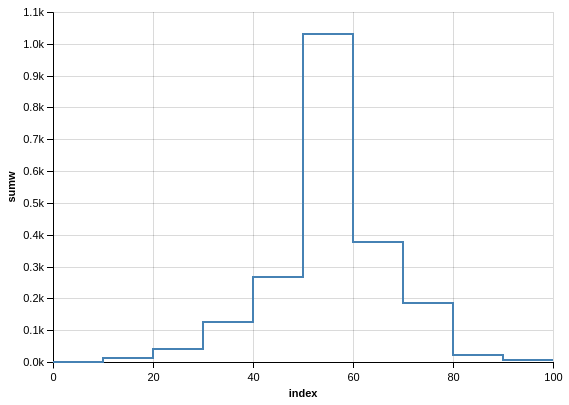

In [7]:
plothist(df)